# Simple vector field examples

This python notebook demonstrates the calculation and visualization of two simple examples of (static) vector fields, namely a) the electric field $\mathbf{E}(\mathbf(x))$ of a point charge and b) the magnetic field $\mathbf{B}(\mathbf{x})$ of a wire with a constant current. See also https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/

We first start with standard imports. We will use `astropy` for units and physical constants.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy import units as u 
from matplotlib.patches import Circle

We then define a grid in `x` and `y` coordinates with units of meters.

In [2]:
x = np.linspace(-2, 2, 64)
y = np.linspace(-2, 2, 64)

xx, yy = np.meshgrid(x, y) # transform into matrix

# Apply units
x *= u.m  
y *= u.m

xx *= u.m
yy *= u.m

Next, we set the charge and its coordinates.

In [3]:
# set the charge and its coordinates
q = 1. * u.C

x0 = 0. * u.m
y0 = 0. * u.m

And now we calculate the electric field of this charge, which is given by 
$$\mathbf{E}(\mathbf{x}) = \frac{q}{4\pi\epsilon_0} \frac{\mathbf{x} - \mathbf{x}_0}{|\mathbf{x} - \mathbf{x}_0|^3}$$

In [4]:
# calculate electric field of a point charge

def Efield(X, Y, q, x0=0. * u.m, y0=0. * u.m):
    """
    Compute the electric field at coordinates X and Y
    of a point charge positioned at x0 and y0
    
    Parameters
    ----------
    X: array-like
        n x m dimensional array for the x coordinates 
        
    Y: array-like
        n x m dimensional array for the Y coordinates 
    
    q: float or `~astropy.units.Quantity`
        Charge in Coulumn 
    
    x0: float or `~astropy.units.Quantity`
        x position of charge
    
    y0: float or `~astropy.units.Quantity`
        y position of charge
    
    Returns
    -------
    (n x m x 2) dimensional array with Electric field in V/m
    """
    E = np.ones(X.shape + (2,)) / u.m**2  # unit set here only so that next line works

    # calculate radius r and polar angle
    rr = np.hypot(xx - x0, yy - y0)  # equivalent to np.sqrt(xx**2 * yy**2)
    pp = np.arctan2(yy - y0, xx - x0)

    # x component
    E[...,0] = np.cos(pp) / rr**2.
    
    # y component
    E[...,1] = np.sin(pp) / rr**2.

    E *= q 
    E /= 4. * np.pi * c.eps0
    return E

# print and check if units are right
E = Efield(xx, yy, q, x0=x0, y0=y0)
E.to("V / m")

<Quantity [[[-7.94394852e+08, -7.94394852e+08],
            [-8.06682878e+08, -8.33131497e+08],
            [-8.18238888e+08, -8.73712711e+08],
            ...,
            [ 8.18238888e+08, -8.73712711e+08],
            [ 8.06682878e+08, -8.33131497e+08],
            [ 7.94394852e+08, -7.94394852e+08]],

           [[-8.33131497e+08, -8.06682878e+08],
            [-8.47340277e+08, -8.47340277e+08],
            [-8.60864601e+08, -8.90046452e+08],
            ...,
            [ 8.60864601e+08, -8.90046452e+08],
            [ 8.47340277e+08, -8.47340277e+08],
            [ 8.33131497e+08, -8.06682878e+08]],

           [[-8.73712711e+08, -8.18238888e+08],
            [-8.90046452e+08, -8.60864601e+08],
            [-9.05760749e+08, -9.05760749e+08],
            ...,
            [ 9.05760749e+08, -9.05760749e+08],
            [ 8.90046452e+08, -8.60864601e+08],
            [ 8.73712711e+08, -8.18238888e+08]],

           ...,

           [[-8.73712711e+08,  8.18238888e+08],
            [-

Lastly we plot the field lines of the electric field using the `matplotlib.pyplot` function `streamplot`. The color of the lines scales as the logarithm of the absolute value of the field. 

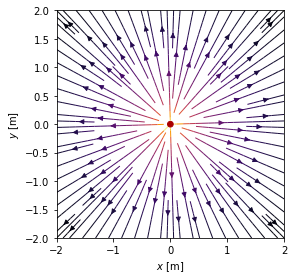

In [5]:
ax = plt.gca()

color = 2 * np.log(np.hypot(E[...,0].value, E[...,1].value))

ax.streamplot(x.value, y.value, E[...,0].value, E[...,1].value,
               color=color,
               linewidth=1,
               cmap=plt.cm.inferno,
               density=1.2,
               arrowstyle='-|>',
               arrowsize=1.)

charge_colors = {True: '#aa0000', False: '#0000aa'}

ax.add_artist(Circle((x0.value, y0.value), 0.05, color=charge_colors[q.value > 0], zorder=10))

ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("Efield.pdf")

Now we turn to the magnetic field. We assume a wire that caries a constant current in positive $z$ direction, $\mathbf{j} = j\hat{\mathbf{z}}$ along the $z$ axis. We assume that the wire's cross section $A$ is much smaller than all other scales we consider. Hence, the $x$ and $y$ coordinates of the wire are taken to be zero.
The current in the wire is simply $I = jA$, which we set in the next cell:

In [6]:
# define current
# and set the charge and its coordinates
# assume positive z direction of current
I = 1. * u.A

x0 = 0. * u.m
y0 = 0. * u.m

We next calculate the magnetic field using the integral form of Ampère's law, i.e.,

$$\oint_\Gamma \mathbf{B} d\mathbf{s} = \mu_0 \int_S \mathbf{j}\cdot\hat{\mathbf{n}} dS,  $$

where $\hat{\mathbf{n}} = \hat{\mathbf{z}}$ is the normal vector of the surface $S$ and $\Gamma$ is the curve around the edge of the surface $S$.
The RHS is simple $\mu_0 I$, as $\mathbf{j}$ is zero outside the wire. The magnetic field will always be parrallel to the line element $d\mathbf{s}$ which, in our chosen coordinate system, points tangential to the vector $\mathbf{x}$ where we want to calculate the field. 

This vector can simply be found be differentiating the unit vector $\hat{\mathbf{r}} = (\cos\varphi, \sin\varphi)$ w.r.t. $\varphi$:

$$\hat{\boldsymbol{\varphi}} = \frac{\partial\hat{\mathbf{r}}}{\partial\varphi} = (-\sin\varphi, \cos\varphi)$$

Thus we find for the LHS,

$$\oint_\Gamma \mathbf{B} d\mathbf{s} = B \oint_\Gamma \hat{\boldsymbol{\varphi}} d\mathbf{s} = rB \int_0^{2\pi} (\sin^2\varphi + \cos^2\varphi)d\varphi = 2\pi r B$$.

Rearranging, we arrive at

$$\mathbf{B} = \frac{\mu_0 I}{2\pi r}\boldsymbol{\varphi}.$$

In [7]:
# Calculate magnetic field of a point charge
def Bfield(X, Y, I, x0=0. * u.m, y0=0. * u.m):
    """
    Compute the magnetic field at coordinates X and Y
    of a current-carrying wire parralel to the z-axis positioned at x0 and y0
    
    Parameters
    ----------
    X: array-like
        n x m dimensional array for the x coordinates 
        
    Y: array-like
        n x m dimensional array for the Y coordinates 
    
    I: float or `~astropy.units.Quantity`
        current of wirse in Ampere 
    
    x0: float or `~astropy.units.Quantity`
        x position of wire
    
    y0: float or `~astropy.units.Quantity`
        y position of wire
    
    Returns
    -------
    (n x m x 2) dimensional array with Electric field in V/m
    """   
    B = np.ones(X.shape + (2,)) / u.m
    
    # calculate radius r and polar angle
    rr = np.hypot(xx - x0, yy - y0)  # equivalent to np.sqrt(xx**2 * yy**2)
    pp = np.arctan2(yy - y0, xx - x0)
    
    # x component
    B[...,0] = -np.sin(pp) / rr

    # y component
    B[...,1] = np.cos(pp) / rr

    B *= I 
    B /= 2. * np.pi 
    B *= c.mu0
    
    return B

# print and check if units are right
B = Bfield(xx, yy, I, x0=x0, y0=y0)
B.to('T')

<Quantity [[[ 5.00000000e-08, -5.00000000e-08],
            [ 5.16124838e-08, -4.99739922e-08],
            [ 5.32751678e-08, -4.98926175e-08],
            ...,
            [ 5.32751678e-08,  4.98926175e-08],
            [ 5.16124838e-08,  4.99739922e-08],
            [ 5.00000000e-08,  5.00000000e-08]],

           [[ 4.99739922e-08, -5.16124838e-08],
            [ 5.16393443e-08, -5.16393443e-08],
            [ 5.33601778e-08, -5.16106637e-08],
            ...,
            [ 5.33601778e-08,  5.16106637e-08],
            [ 5.16393443e-08,  5.16393443e-08],
            [ 4.99739922e-08,  5.16124838e-08]],

           [[ 4.98926175e-08, -5.32751678e-08],
            [ 5.16106637e-08, -5.33601778e-08],
            [ 5.33898305e-08, -5.33898305e-08],
            ...,
            [ 5.33898305e-08,  5.33898305e-08],
            [ 5.16106637e-08,  5.33601778e-08],
            [ 4.98926175e-08,  5.32751678e-08]],

           ...,

           [[-4.98926175e-08, -5.32751678e-08],
            [-

We plot the field lines of the magnetic field as before. Again, the color of the lines scales as the logarithm of the absolute value of the field. 

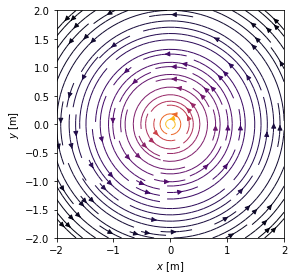

In [8]:
ax = plt.gca()

color = 2 * np.log(np.hypot(B[...,0].value, B[...,1].value))

ax.streamplot(x.value, y.value, B[...,0].value, B[...,1].value,
               color=color,
               linewidth=1,
               cmap=plt.cm.inferno,
               density=1.2,
               arrowstyle='-|>',
               arrowsize=1.)

ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("Bfield.pdf")